# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

W1205 21:58:59.158018  3124 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:107: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W1205 21:58:59.169987  3124 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:111: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1205 21:58:59.171953  3124 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1205 21:58:59.172953  3124 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placehol

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.8203 - acc: 0.3490 - val_loss: 1.7482 - val_acc: 0.3725
Epoch 2/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6003 - acc: 0.4308 - val_loss: 1.5933 - val_acc: 0.4361
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5119 - acc: 0.4664 - val_loss: 1.5499 - val_acc: 0.4524
Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4487 - acc: 0.4841 - val_loss: 1.4640 - val_acc: 0.4819
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4022 - acc: 0.5020 - val_loss: 1.4526 - val_acc: 0.4823
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.3570 - acc: 0.5181 - val_loss: 1.4460 - val_acc: 0.4791
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.3233 - acc: 0.5312 - val_loss: 1.4003 - val_acc

50000/50000 [==============================] - 2s 39us/step - loss: 1.8090 - acc: 0.3650 - val_loss: 1.7623 - val_acc: 0.3773
Epoch 3/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.7263 - acc: 0.3958 - val_loss: 1.7044 - val_acc: 0.4036
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6682 - acc: 0.4160 - val_loss: 1.6450 - val_acc: 0.4252
Epoch 5/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6216 - acc: 0.4336 - val_loss: 1.6022 - val_acc: 0.4418
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5806 - acc: 0.4485 - val_loss: 1.5761 - val_acc: 0.4432
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5468 - acc: 0.4574 - val_loss: 1.5530 - val_acc: 0.4544
Epoch 8/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5183 - acc: 0.4698 - val_loss: 1.5384 - val_acc: 0.4544
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 58us/step - loss: 2.0230 - acc: 0.2961 - val_loss: 1.9920 - val_acc: 0.3057
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.9703 - acc: 0.3142 - val_loss: 1.9471 - val_acc: 0.3225
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9306 - acc: 0.3325 - val_loss: 1.9115 - val_acc: 0.3343
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8986 - acc: 0.3417 - val_loss: 1.8836 - val_acc: 0.3488
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8725 - acc: 0.3501 - val_loss: 1.8606 - val_acc: 0.3528
Epoch 8/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8503 - acc: 0.3581 - val_loss: 1.8404 - val_acc: 0.3610
Epoch 9/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.8317 - acc: 0.3633 - val_loss: 1.8240 - val_acc: 0.3655
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 2s 38us/step - loss: 2.2559 - acc: 0.1567 - val_loss: 2.2452 - val_acc: 0.1664
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.2405 - acc: 0.1730 - val_loss: 2.2310 - val_acc: 0.1871
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.2267 - acc: 0.1885 - val_loss: 2.2181 - val_acc: 0.1996
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.2140 - acc: 0.1987 - val_loss: 2.2059 - val_acc: 0.2076
Epoch 8/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.2020 - acc: 0.2108 - val_loss: 2.1942 - val_acc: 0.2174
Epoch 9/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1903 - acc: 0.2178 - val_loss: 2.1829 - val_acc: 0.2248
Epoch 10/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1787 - acc: 0.2253 - val_loss: 2.1715 - val_acc: 0.2308
Epoch 11/50
50000/50000 [==========================

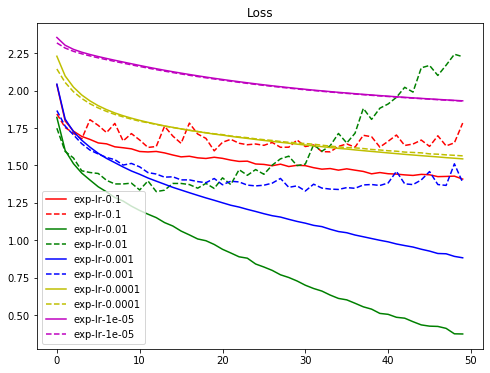

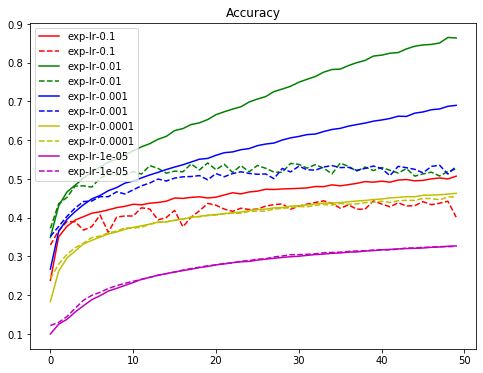

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.4448 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 2s 44us/step - loss: 2.3074 - acc: 0.2148 - val_loss: 2.1036 - val_acc: 0.2567
Epoch 2/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.8918 - acc: 0.3152 - val_loss: 1.8580 - val_acc: 0.3106
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7830 - acc: 0.3588 - val_loss: 1.8180 - val_acc: 0.3413
Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.7084 - acc: 0.3872 - val_loss: 1.6799 - val_acc: 0.4073
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6490 - acc: 0.4108 - val_loss: 1.7445 - val_acc: 0.3786
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6112 - acc: 0.4244 - val_loss: 1.5976 - val_acc: 0.4303
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5650 - acc: 0.4409 - val_loss: 1.6918 - val_acc: 0.4043
Epoch 8/50
50000/50000 [============================

50000/50000 [==============================] - 2s 39us/step - loss: 1.7940 - acc: 0.3595 - val_loss: 1.7706 - val_acc: 0.3541
Epoch 3/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.7136 - acc: 0.3916 - val_loss: 1.7881 - val_acc: 0.3742
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6587 - acc: 0.4124 - val_loss: 1.7080 - val_acc: 0.3933
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6156 - acc: 0.4264 - val_loss: 1.6529 - val_acc: 0.4120
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5786 - acc: 0.4420 - val_loss: 1.6507 - val_acc: 0.4180
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5496 - acc: 0.4535 - val_loss: 1.6205 - val_acc: 0.4241
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5218 - acc: 0.4644 - val_loss: 1.5504 - val_acc: 0.4538
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 40us/step - loss: 1.8966 - acc: 0.3462 - val_loss: 1.8757 - val_acc: 0.3538
Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.8486 - acc: 0.3619 - val_loss: 1.8321 - val_acc: 0.3609
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.8114 - acc: 0.3750 - val_loss: 1.8001 - val_acc: 0.3715
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.7823 - acc: 0.3859 - val_loss: 1.7701 - val_acc: 0.3859
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.7574 - acc: 0.3929 - val_loss: 1.7536 - val_acc: 0.3883
Epoch 8/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.7360 - acc: 0.4013 - val_loss: 1.7374 - val_acc: 0.3899
Epoch 9/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.7177 - acc: 0.4049 - val_loss: 1.7153 - val_acc: 0.4023
Epoch 10/50
50000/50000 [===========================

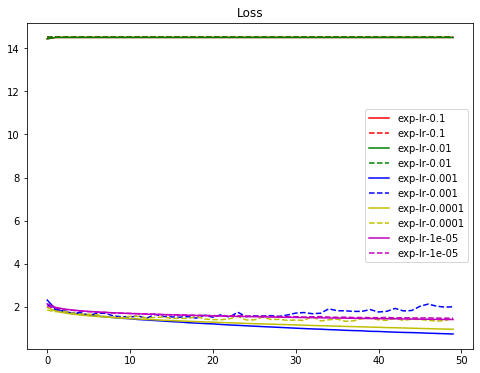

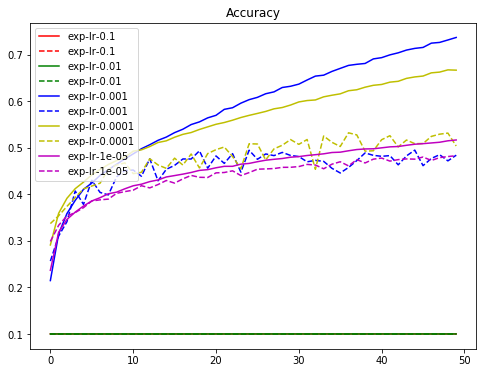

In [8]:
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = keras.optimizers.RMSprop(lr=lr)
            
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.4408 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 2s 43us/step - loss: 1.9923 - acc: 0.2850 - val_loss: 1.8875 - val_acc: 0.3161
Epoch 2/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8005 - acc: 0.3641 - val_loss: 1.8253 - val_acc: 0.3357
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7239 - acc: 0.3944 - val_loss: 1.7014 - val_acc: 0.3982
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6769 - acc: 0.4113 - val_loss: 1.6790 - val_acc: 0.4085
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6443 - acc: 0.4234 - val_loss: 1.6469 - val_acc: 0.4202
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6157 - acc: 0.4339 - val_loss: 1.6454 - val_acc: 0.4174
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5934 - acc: 0.4425 - val_loss: 1.6549 - val_acc: 0.4132
Epoch 8/50
50000/50000 [============================

50000/50000 [==============================] - 2s 39us/step - loss: 1.9309 - acc: 0.3307 - val_loss: 1.9018 - val_acc: 0.3363
Epoch 3/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.8861 - acc: 0.3455 - val_loss: 1.8683 - val_acc: 0.3529
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8578 - acc: 0.3559 - val_loss: 1.8450 - val_acc: 0.3607
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8369 - acc: 0.3620 - val_loss: 1.8278 - val_acc: 0.3654
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.8210 - acc: 0.3678 - val_loss: 1.8142 - val_acc: 0.3711
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8073 - acc: 0.3727 - val_loss: 1.8018 - val_acc: 0.3747
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7958 - acc: 0.3753 - val_loss: 1.7934 - val_acc: 0.3715
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 39us/step - loss: 2.2154 - acc: 0.2186 - val_loss: 2.2027 - val_acc: 0.2267
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1971 - acc: 0.2291 - val_loss: 2.1864 - val_acc: 0.2376
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1822 - acc: 0.2387 - val_loss: 2.1729 - val_acc: 0.2452
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1697 - acc: 0.2479 - val_loss: 2.1616 - val_acc: 0.2522
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1590 - acc: 0.2544 - val_loss: 2.1517 - val_acc: 0.2593
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1494 - acc: 0.2597 - val_loss: 2.1427 - val_acc: 0.2635
Epoch 9/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1407 - acc: 0.2637 - val_loss: 2.1345 - val_acc: 0.2673
Epoch 10/50
50000/50000 [===========================

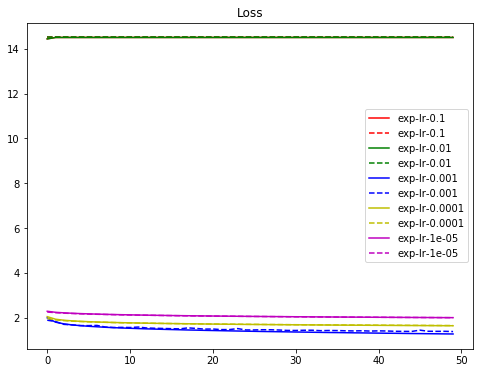

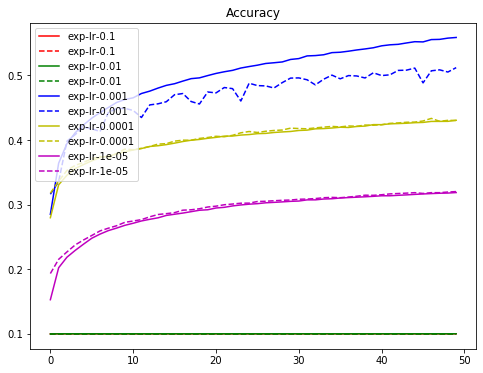

In [9]:
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = keras.optimizers.Adagrad(lr=lr)
            
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.4464 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 2s 47us/step - loss: 1.9315 - acc: 0.3029 - val_loss: 1.7985 - val_acc: 0.3557
Epoch 2/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6950 - acc: 0.3944 - val_loss: 1.6338 - val_acc: 0.4190
Epoch 3/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6112 - acc: 0.4210 - val_loss: 1.5558 - val_acc: 0.4451
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5482 - acc: 0.4493 - val_loss: 1.5247 - val_acc: 0.4469
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4973 - acc: 0.4646 - val_loss: 1.4826 - val_acc: 0.4660
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4630 - acc: 0.4829 - val_loss: 1.4816 - val_acc: 0.4710
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4298 - acc: 0.4914 - val_loss: 1.4693 - val_acc: 0.4776
Epoch 8/50
50000/50000 [============================

50000/50000 [==============================] - 2s 41us/step - loss: 1.7202 - acc: 0.3928 - val_loss: 1.6562 - val_acc: 0.4182
Epoch 3/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6303 - acc: 0.4232 - val_loss: 1.6049 - val_acc: 0.4301
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5673 - acc: 0.4493 - val_loss: 1.6047 - val_acc: 0.4378
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5249 - acc: 0.4619 - val_loss: 1.5176 - val_acc: 0.4612
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4843 - acc: 0.4771 - val_loss: 1.4924 - val_acc: 0.4724
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4573 - acc: 0.4847 - val_loss: 1.4711 - val_acc: 0.4818
Epoch 8/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4293 - acc: 0.4969 - val_loss: 1.4772 - val_acc: 0.4695
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 41us/step - loss: 1.8589 - acc: 0.3584 - val_loss: 1.8346 - val_acc: 0.3666
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.8073 - acc: 0.3744 - val_loss: 1.7935 - val_acc: 0.3779
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7727 - acc: 0.3841 - val_loss: 1.7612 - val_acc: 0.3887
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7427 - acc: 0.3956 - val_loss: 1.7373 - val_acc: 0.3923
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7176 - acc: 0.4027 - val_loss: 1.7102 - val_acc: 0.4085
Epoch 8/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6948 - acc: 0.4098 - val_loss: 1.6926 - val_acc: 0.4118
Epoch 9/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6755 - acc: 0.4176 - val_loss: 1.6789 - val_acc: 0.4144
Epoch 10/50
50000/50000 [===========================

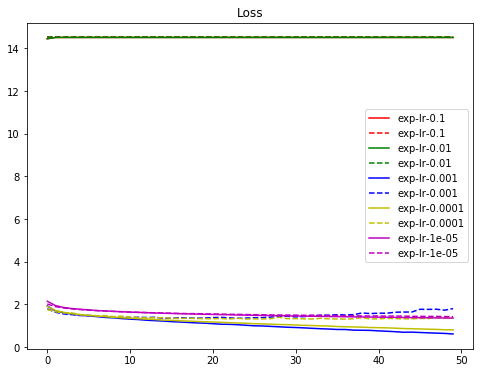

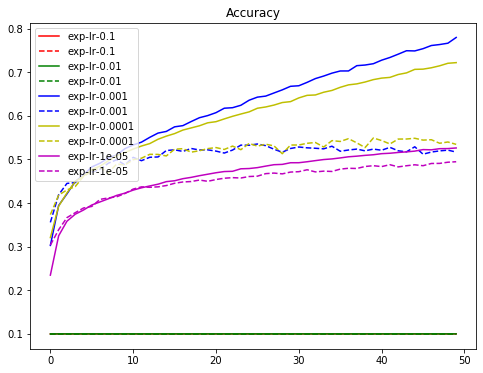

In [10]:
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = keras.optimizers.Adam(lr=lr)
            
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()